<a href="https://colab.research.google.com/github/victoria-2023/PythonScript-Simulation/blob/main/Online_Session_Simulating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Post 0: Likes 6, Shares 1, Visibility 8, Flagged False
Post 1: Likes 21, Shares 6, Visibility 33, Flagged False
Post 2: Likes 17, Shares 4, Visibility 25, Flagged False
Post 3: Likes 8, Shares 0, Visibility 4.0, Flagged True
Post 4: Likes 20, Shares 7, Visibility 17.0, Flagged True
Post 5: Likes 19, Shares 5, Visibility 14.5, Flagged True
Post 6: Likes 12, Shares 5, Visibility 11.0, Flagged True
Post 7: Likes 16, Shares 6, Visibility 14.0, Flagged True
Post 8: Likes 16, Shares 5, Visibility 26, Flagged False
Post 9: Likes 26, Shares 7, Visibility 20.0, Flagged True


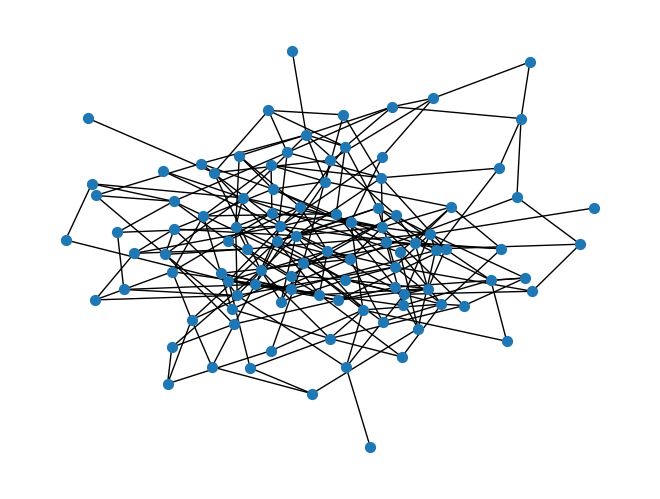

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Initialize an empty DataFrame for posts with additional engagement metrics
posts = pd.DataFrame(columns=['postId', 'content', 'truthfulness', 'originalPoster', 'likes', 'shares', 'flagged'])

# Function to generate a post
def create_post(user_id, content, truthfulness):
    global posts
    post_id = len(posts)
    posts = posts.append({
        'postId': post_id, 'content': content, 'truthfulness': truthfulness,
        'originalPoster': user_id, 'likes': 0, 'shares': 0, 'flagged': False
    }, ignore_index=True)
    return post_id

# Function to calculate post visibility based on engagement
def calculate_visibility(post_id):
    post = posts.loc[post_id]
    # Simplified visibility calculation: likes + 2*shares, decrease if flagged
    visibility_score = post['likes'] + 2 * post['shares']
    if post['flagged']:
        visibility_score *= 0.5  # Halve the visibility if the post is flagged
    return visibility_score

# Function for a user to interact with a post (like or share)
def interact_with_post(user_id, post_id, action='like'):
    global posts
    if action == 'like':
        posts.at[post_id, 'likes'] += 1
    elif action == 'share':
        posts.at[post_id, 'shares'] += 1
        share_post(user_id, post_id)

# Function for a user to share a post
def share_post(user_id, post_id):
    # Share post within user's network
    for neighbor in G.neighbors(user_id):
        if random.random() < 0.5:  # 50% chance of each neighbor seeing the shared post
            interact_with_post(neighbor, post_id, action='like')  # Neighbors automatically like the shared post

# Create a social network graph
G = nx.erdos_renyi_graph(100, 0.05)  # 100 users, with a 5% probability of connection

# Flagging mechanism for misinformation
def flag_posts():
    global posts
    for index, row in posts.iterrows():
        if row['truthfulness'] == 'False' and random.random() < 0.8:  # 80% chance to flag misinformation
            posts.at[index, 'flagged'] = True

# Simulate creating initial posts by users in the network
for user in range(10):
    content = f"Post by user {user}"
    truthfulness = random.choice(['True', 'False'])
    create_post(user, content, truthfulness)

# Simulate user interactions (likes and shares) based on network connections
for user in range(10, 100):
    if G.degree[user] > 0:  # Only consider users with connections
        post_id = random.choice(posts['postId'].tolist())
        action = 'share' if random.random() < 0.5 else 'like'
        interact_with_post(user, post_id, action)

flag_posts()  # Flag posts after initial interactions

# Display posts with engagement, visibility, and flag status
for index, row in posts.iterrows():
    visibility = calculate_visibility(row['postId'])
    print(f"Post {row['postId']}: Likes {row['likes']}, Shares {row['shares']}, Visibility {visibility}, Flagged {row['flagged']}")

# Visualize the network
nx.draw(G, with_labels=False, node_size=50)
plt.show()
